In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt

# Tarea 5
### Ecuaciones de Derivadas Parciales y la ecuación de Advección


#### Métodos Númericos para la Ciencia y la Ingeniería

#### Victor Faraggi

## Problema 1

En este problema se busca resolver la ecuación de Advección utilizando el método de Lax-Wendroff

Para esto, se define en primer lugar la ecuación:

$$
\frac{\partial u}{\partial t} = -c\frac{\partial u}{\partial x}, \quad \textrm{c > 0}
\\
\iff
\\
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0 , \quad \textrm{c > 0}
$$

Asímismo, se recuerda el métodod de Lax-Wendroff:
$$
u^{n+1}_j=u^{n}_j+\frac{\Delta t}{\Delta x}\bigg(F_{i−1/2}−F–{i+1/2}\bigg)
$$


Lo que para este caso resulta en:
$$
 u^{n+1}_j = u^{n}_j - \alpha \bigg[\frac{1}{2} \big(u^n_{j+1}+u^n_{j}\big) - \frac{1}{2}\alpha \big(u^n_{j+1}−u^n_{j}\big) − \frac{1}{2} \big(u^n_{j} +u^n_{j-1}\big) + \frac{1}{2}\alpha \big(u^n_{j} −u^n_{j-1}\big)\bigg]
$$

Donde $ \alpha = c\frac{\Delta t}{\Delta x} ≤ 1$.

Factorizando esta ecuación se obtiene:

$$
u^{n+1}_j = u^{n}_j + \alpha \bigg[ \frac{\alpha}{2}\big(u^n_{j+1} - 2u^n_{j} + u^n_{j-1}\big) -  \frac{1}{2}\big(u^n_{j+1} + u^n_{j-1}\big) \bigg]
\\
\iff
\\
u^{n+1}_j=\frac{\alpha(\alpha+1)}{2}u^n_{j−1}+(1−\alpha^2)u^n_j+\frac{\alpha(\alpha+1)}{2}u^n_{j+1}
$$

Antes de seguir se definen las constantes y la discretización del problema:

In [2]:
t_min, t_max = 0.0, 10.0 
x_min, x_max = 0.0, 10.0 

Nx = 101 # cantidad de pasos en x
c = 0.9 + 0.1*315/999

# Discretizacion
x = np.linspace(x_min, x_max, Nx) # vector x

dx = float((x_max-x_min)/Nx) # dx
dt = t_max *(10**(-3)) 

alpha = c *dt/dx

Nt = int((t_max-t_min)/dt) # cantidad de pasos en el tiempo

time = np.linspace(t_min, t_max, Nt) # vector t

print ('Número de Courant = %6.4f (debe ser menor o igual a 1)' % alpha)

Número de Courant = 0.0941 (debe ser menor o igual a 1)


Recordamos la condición inicial. Esta se define por:

$$
u_0(x,0) = \left\{\begin{array}{cc}
                    1 & 0 \leq x \leq 1 \\
                    0 & \mathrm{resto}
                  \end{array}\right.
$$

Ahora, se define la función, con su condición inicial:

In [3]:
def f(x):
    ## Se crea un vector que indica tiene los diferentes pasos de x
    f = np.zeros_like(x)
    
    ## Así, es más fácil insertar la condición incial
    f[np.where(x <= 1)] = 1.0
    return f

Luego, se puede definir el método de resolución:

In [4]:
def lax_wendroff(u): 
    u[1:-1] = alpha/2.0*(1+alpha)*u[:-2] + (1-alpha**2)*u[1:-1] - alpha/2.0*(1-alpha)*u[2:]
    return u[1:-1]

Se nos pide compara la solución análitica con la calculada. Por esto se crean dos vectores que contienen ambas soluciones:

In [5]:
u_solucion = np.zeros((len(time),len(x)))
u_analitica = np.zeros((len(time), len(x)))

Se inicializa la resolución:

In [6]:
u = f(x)
un = np.zeros((len(time), len(x)))

Primero, se calcula la solución análitica:

In [7]:
for i, t in enumerate(time[1:]):
    u_analitica[i,:] = f(x-c*t)

Luego, la solución numerica:

In [8]:
for i, t in enumerate(time[1:]):
    u[1:-1] = lax_wendroff(u[:]) 
    
    un[i,:] = u[:]
    
u_solucion[:,:] = un

Ahora que se tiene resuelto de manera analítica y númerica, se calcula el error cuadrático medio entre las soluciones:

In [9]:
def RMS_cuadrado(calculada, analitica, T):
    N = len(analitica[T])
    rms = 0
    j = 0
    while j < (N -1):
        rms += (calculada[T+1,j] - analitica[T+1,j])**2
        j += 1
    return (1/N) * rms

errores = []
errores.append([RMS_cuadrado(u_solucion, u_analitica, 4), RMS_cuadrado(u_solucion, u_analitica, 7)])
print("Usando alpha =", alpha)
print("El RMS cuadrado para T = 4 y T = 7 es, respectivamente, de:", errores[0][0], errores[0][1])

Usando alpha = 0.0940846846846847
El RMS cuadrado para T = 4 y T = 7 es, respectivamente, de: 0.0015535339049998595 0.003415850683878966


Encapsulamos lo hecho para poder cambiar el valor de $\alpha$ (u otros si se quisiera) fácilmente:

In [10]:
def resolucion(alpha_valor):
    t_min, t_max = 0.0, 10.0 
    x_min, x_max = 0.0, 10.0 

    Nx = 101 # cantidad de pasos en x
    c = 0.9 + 0.1*315/999

    # Discretizacion
    x = np.linspace(x_min, x_max, Nx) # vector x
    
    dx = float((x_max-x_min)/Nx) # dx
    dt = t_max *(10**(-3)) # dt
    
    alpha_final = alpha_valor
    
    Nt = int((t_max-t_min)/dt) # cantidad de pasos en el tiempo

    time = np.linspace(t_min, t_max, Nt) # vector t

    print ('Número de Courant = %6.4f (debe ser menor o igual a 1)' % alpha_final)
    
    
    # Funcion y método
    def f(x):
        ## Se crea un vector que indica tiene los diferentes pasos de x
        f = np.zeros_like(x)
    
        ## Así, es más fácil insertar la condición incial
        f[np.where(x <= 1)] = 1.0
        return f
    
    
    def lax_wendroff(u, alpha=alpha_final): 
        u[1:-1] = alpha/2.0*(1+alpha)*u[:-2] + (1-alpha**2)*u[1:-1] - alpha/2.0*(1-alpha)*u[2:]
        return u[1:-1]
    
    
    # Inicializacion de vectores
    
    u_solucion = np.zeros((len(time),len(x)))
    u_analitica = np.zeros((len(time), len(x))
                          )
    u = f(x)
    un = np.zeros((len(time), len(x)))
    
    # Resolucion
    
    for i, t in enumerate(time[1:]):
        u_analitica[i,:] = f(x-c*t)
        
    for i, t in enumerate(time[1:]):
        u[1:-1] = lax_wendroff(u[:]) 
    
        un[i,:] = u[:]
    
    u_solucion[:,:] = un

    return u_analitica, u_solucion

Ahora realizamos el mismo cálculo del RMS cuadrado para distintos valores $\alpha$

In [11]:
alphas = [0.6, 0.9, 1]

for k, i in enumerate(alphas):
    
    print("Usando alpha =", i)
    u_teo, u_sol = resolucion(i)
    errores.append([RMS_cuadrado(u_sol, u_teo, 4), RMS_cuadrado(u_sol, u_teo, 7)])
    print("El RMS cuadrado para T = 4 y T = 7 es, respectivamente, de:"
          , errores[k + 1][0],errores[k + 1][1])
    print()

Usando alpha = 0.6
Número de Courant = 0.6000 (debe ser menor o igual a 1)
El RMS cuadrado para T = 4 y T = 7 es, respectivamente, de: 0.03378978222002342 0.05066345371331277

Usando alpha = 0.9
Número de Courant = 0.9000 (debe ser menor o igual a 1)
El RMS cuadrado para T = 4 y T = 7 es, respectivamente, de: 0.05133994755573493 0.07772839221724868

Usando alpha = 1
Número de Courant = 1.0000 (debe ser menor o igual a 1)
El RMS cuadrado para T = 4 y T = 7 es, respectivamente, de: 0.0594059405940594 0.0891089108910891



Así, gráficando estos valores:

In [12]:
alphas.insert(0,alpha)

errores_T4 = []
for error_alpha in errores:
    errores_T4.append(error_alpha[0])
    
print(errores_T4)

errores_T7 = []
for error_alpha in errores:
    errores_T7.append(error_alpha[1]) 

[0.0015535339049998595, 0.03378978222002342, 0.05133994755573493, 0.0594059405940594]


Text(0.5, 1.0, 'RMS cuadrado para distintos valores de alpha para T = 4 y T = 7')

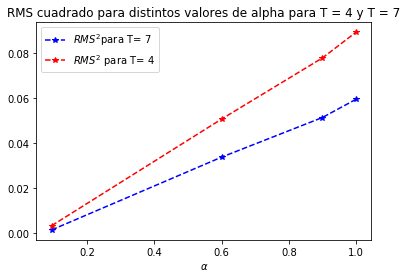

In [13]:
fig, ax = plt.subplots()

# errors for T =4, T =7
ax.plot(alphas, errores_T4, 'b*--',label='$RMS^2$' +  'para T= 7')
ax.plot(alphas, errores_T7, 'r*--', label='$RMS^2$' + ' para T= 4')
ax.set_xlabel(r'$\alpha$')
plt.legend()
plt.title('RMS cuadrado para distintos valores de' + " alpha " +'para T = 4 y T = 7')